# Can we design an algorithm to spot active Minecraft players?

**Group 004-008**

Atlas **Danks** **(59825927)**,
Isabelle **He** **(26923540)**,
Aisa **Rafiei** **(80157365)**,
Steven **Weng** **(95102919)**.

## Introduction and Background Information

PLAI, the Pacific Laboratory for Artificial Intelligence, is a research lab at the University of British Columbia which is currently aiming to create artificially intelligent NPCs capable of playing the video game Minecraft. To accomplish this, they have created a custom server from which they can collect data on how players of Minecraft interact throughout the game’s world. 
One question that is relevant to their study is which `kinds` of players are most likely to contribute the most data to their research, something which could be measured by metrics such as the number of `hours played`. To answer this, our own research question was whether we could clearly define “good players” as a category from the data they have given us and create an algorithm that could accurately predict whether an individual player would contribute a significant amount.


To analyze this question, we used the `players.csv` file. This file lists all players who have signed up, as well as their `gender`, `age`, self-reported `experience` level, whether they have subscribed to the PLAIcraft email listing, as well as how many hours they have played. 

In [2]:
library(tidyverse)
library(tidymodels)
library(repr)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

In [3]:
#Reading in data and basic tidying

players_url <- "https://drive.google.com/uc?export=download&id=1Mw9vW0hjTJwRWx0bDXiSpYsO3gKogaPz"
players_data <- read_csv(players_url)

sessions_url <- "https://drive.google.com/uc?export=download&id=14O91N5OlVkvdGxXNJUj5jIsV5RexhzbB"
sessions_data <- read_csv(sessions_url)

sessions_per_player <- sessions_data |>
group_by(hashedEmail) |>
summarize(sessions = n()) |>
arrange(-sessions) 

combined_data <- left_join(players_data, sessions_per_player, by = "hashedEmail")

modified_data <- combined_data |>
  mutate(gender = as_factor(gender))

clean_data <- modified_data |>
    select(- individualId, -organizationName) |>
    filter(age <90)
clean_data

Rows: 196 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, age
lgl (3): subscribe, individualId, organizationName

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,age,sessions
<chr>,<lgl>,<chr>,<dbl>,<chr>,<fct>,<dbl>,<int>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9,27
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17,3
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17,1
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21,1
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21,1
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17,NA
Regular,TRUE,8e594b8953193b26f498db95a508b03c6fe1c24bb5251d392c18a0da9a722807,0.0,Luna,Female,19,NA
Amateur,FALSE,1d2371d8a35c8831034b25bda8764539ab7db0f63938696917c447128a2540dd,0.0,Emerson,Male,21,1
Amateur,TRUE,8b71f4d66a38389b7528bb38ba6eb71157733df7d1740371852a797ae97d82d1,0.1,Natalie,Male,17,1


In [4]:
#specified filtered data

data_over1h <- clean_data |>
    filter(played_hours >= 1)

data_over3h <- clean_data |>
    filter(played_hours >= 3)

In [5]:
#ASSIGNING LABELS: GOOD (1H+ PLAYED) VS BAD (<1H PLAYED) CONTRIBUTOR


#over 1h data

more_filter <- clean_data |>
    filter(played_hours >= 1)
#more_filter

#mutated_more_filter <- more_filter |>
 #   mutate(Type = played_hours) |>
 #   mutate(Type = as_factor(Type)) |>
 #   mutate(Type = fct_recode(Type, "Good contributor" = "Good", "Bad contributor" = "Bad"))

#mutated_more_filter




# As a 0/1 variable
clean_data$over1 <- as.numeric(clean_data$played_hours >= 1)

# Examine new variable
table(clean_data$over1, useNA = "ifany")


# Check range of original variable at levels of new
tapply(clean_data$played_hours, clean_data$over1, range)



# As a factor
clean_data$over1_fac <- factor(clean_data$over1,
                            levels = 0:1,
                            labels = c("<1h", ">1h"))

# Examine new variable
table(clean_data$over1_fac, useNA = "ifany")


# Check range of original variable at levels of new
tapply(clean_data$played_hours, clean_data$over1_fac, range)


#Final wrangling of the data!
labelled_data <- clean_data |>
    select(-over1) |>
    mutate(contributor_type = fct_recode(over1_fac, "Bad" = "<1h", "Good" = ">1h")) |>
    select(-over1_fac) |>
    mutate(sessions = if_else(is.na(sessions), 0, sessions)) #Changing sessions "NA" to 0 sessions
labelled_data


  0   1 
152  42 

$`0`
[1] 0.0 0.9

$`1`
[1]   1.0 223.1


<1h >1h 
152  42 

$`<1h`
[1] 0.0 0.9

$`>1h`
[1]   1.0 223.1

experience,subscribe,hashedEmail,played_hours,name,gender,age,sessions,contributor_type
<chr>,<lgl>,<chr>,<dbl>,<chr>,<fct>,<dbl>,<dbl>,<fct>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9,27,Good
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17,3,Good
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17,1,Bad
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21,1,Bad
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21,1,Bad
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17,0,Bad
Regular,TRUE,8e594b8953193b26f498db95a508b03c6fe1c24bb5251d392c18a0da9a722807,0.0,Luna,Female,19,0,Bad
Amateur,FALSE,1d2371d8a35c8831034b25bda8764539ab7db0f63938696917c447128a2540dd,0.0,Emerson,Male,21,1,Bad
Amateur,TRUE,8b71f4d66a38389b7528bb38ba6eb71157733df7d1740371852a797ae97d82d1,0.1,Natalie,Male,17,1,Bad


In [6]:
#splitting the data

data_split <- initial_split(labelled_data, prop = 0.75, strata = experience)
training_data <- training(data_split)
testing_data <- testing(data_split)

In [7]:
#Creating the model; no cross validation

#training_data

training_recipe <- recipe(contributor_type ~ experience + subscribe + gender + age + sessions, 
                          data = training_data)

knn_training <- nearest_neighbor(weight_func = "rectangular", neighbors = 3) |>
			set_engine("kknn") |>
			set_mode("classification")

knn_fit <- workflow() |>
        add_recipe(training_recipe) |>
        add_model(knn_training) |>
        fit(data = training_data)
knn_fit

predictions <- predict(knn_fit, testing_data) |>
    bind_cols(testing_data)
predictions

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
0 Recipe Steps

── Model ───────────────────────────────────────────────────────────────────────

Call:
kknn::train.kknn(formula = ..y ~ ., data = data, ks = min_rows(3,     data, 5), kernel = ~"rectangular")

Type of response variable: nominal
Minimal misclassification: 0.2237762
Best kernel: rectangular
Best k: 3

.pred_class,experience,subscribe,hashedEmail,played_hours,name,gender,age,sessions,contributor_type
<fct>,<chr>,<lgl>,<chr>,<dbl>,<chr>,<fct>,<dbl>,<dbl>,<fct>
Bad,Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17,3,Good
Bad,Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17,1,Bad
Bad,Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21,1,Bad
Bad,Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21,1,Bad
Bad,Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17,0,Bad
Bad,Beginner,TRUE,9db37a1d381697f6c83e3b97b276e38bb9d9c811ba4596edb75d4dbfea6415b0,0.0,Elodie,Female,17,0,Bad
Bad,Beginner,TRUE,89c8e07d6a2aa102d9cd05086d51b2e41195c9c807dd976a06f4262ff36d0cca,0.0,Ren,Male,17,0,Bad
Bad,Regular,TRUE,50cec73a632e4be7b155c3df5165de28b2c5baf092abcb7f509f5645776a56c2,0.0,Iman,Male,17,0,Bad
Bad,Amateur,TRUE,1683a3e0aed65119f83540274ff6f965fdf66890613a80f88572dfb1d9f1d2ad,0.0,Farid,Male,17,0,Bad


In [8]:
predictions |>
  metrics(truth = contributor_type, estimate = .pred_class) |>
  filter(.metric == "accuracy")

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.8627451


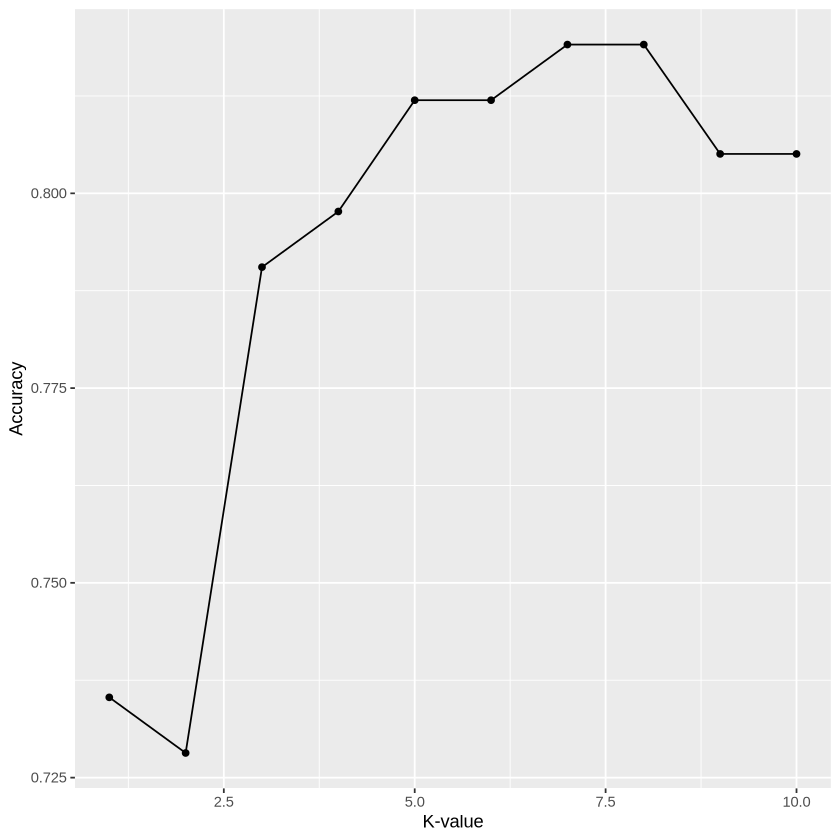

In [9]:
#TUNING/cross validation

set.seed(3456)

classification_recipe <- recipe(contributor_type ~ subscribe + age + sessions + gender, 
                          data = training_data) |>
    step_scale(age, sessions) |>
    step_center(age, sessions)

classification_knn <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
			set_engine("kknn") |>
			set_mode("classification")


data_vfold <- vfold_cv(training_data, v = 5, strata = contributor_type)

k_vals <- tibble(neighbors = seq(from = 1, to = 10, by = 1))


metrics <- workflow() |>
        add_recipe(classification_recipe) |>
        add_model(classification_knn) |>
        tune_grid(resamples = data_vfold, grid = k_vals) |>
        collect_metrics() |>
        filter(.metric == "accuracy")
#metrics


cross_val_plot <- ggplot(metrics, aes(x= neighbors, y= mean)) +
    geom_point() +
    geom_line() +
    labs(x= "K-value", y= "Accuracy")
cross_val_plot

In [10]:
# BUILDING THE TUNED/ACTUAL MODEL

tuned_knn <- nearest_neighbor(weight_func = "rectangular", neighbors = 7) |>
			set_engine("kknn") |>
			set_mode("classification")

tuned_fit <- workflow() |>
    add_recipe(classification_recipe) |>
    add_model(tuned_knn) |>
    fit(data = training_data)
#tuned_fit

predictions <- predict(tuned_fit, testing_data) |>
    bind_cols(testing_data)
#predictions

tuned_accuracy <- predictions |>
        metrics(truth = contributor_type, estimate = .pred_class) |>
        filter(.metric == "accuracy")
tuned_accuracy 

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.8627451


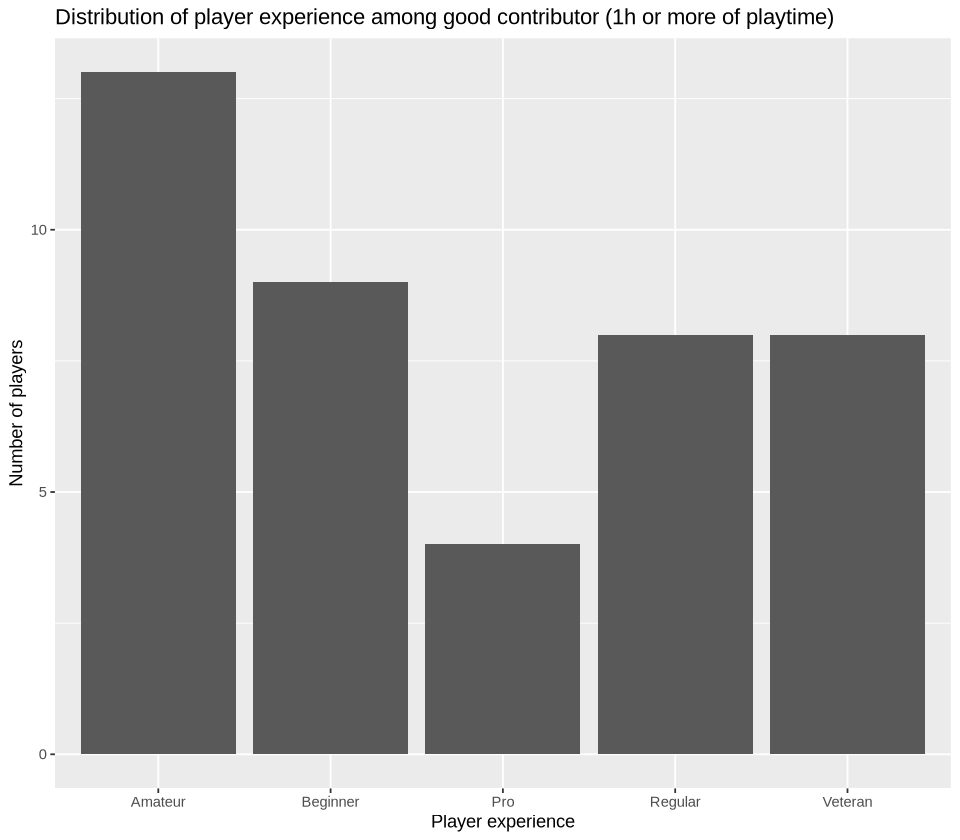

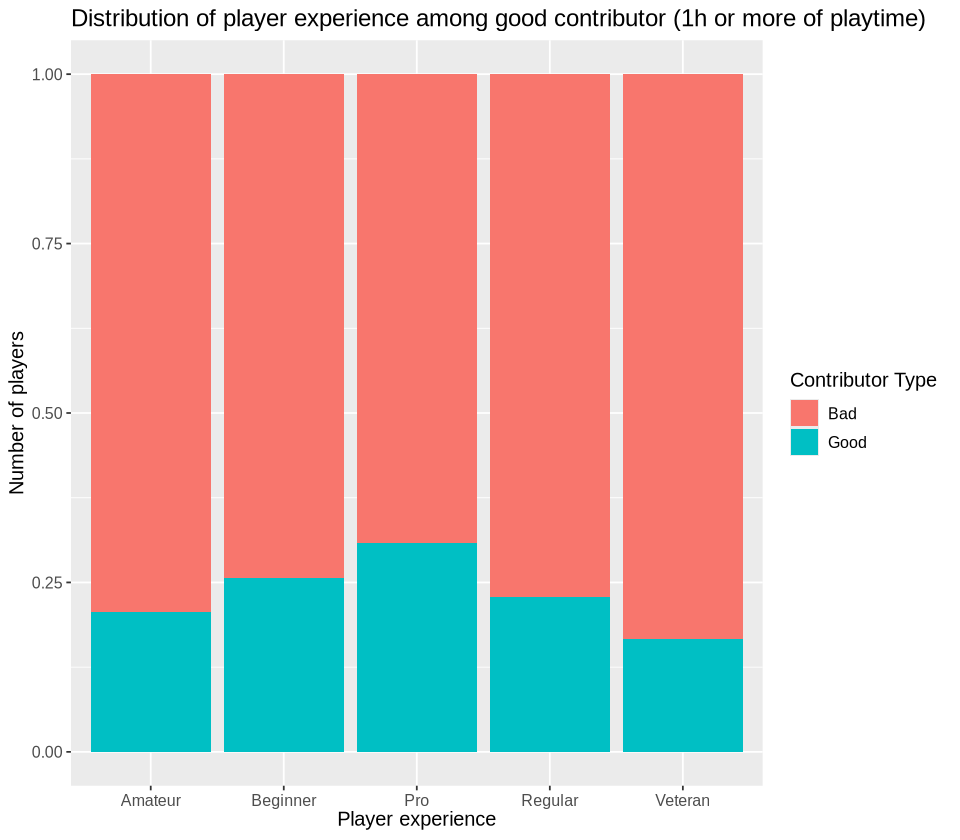

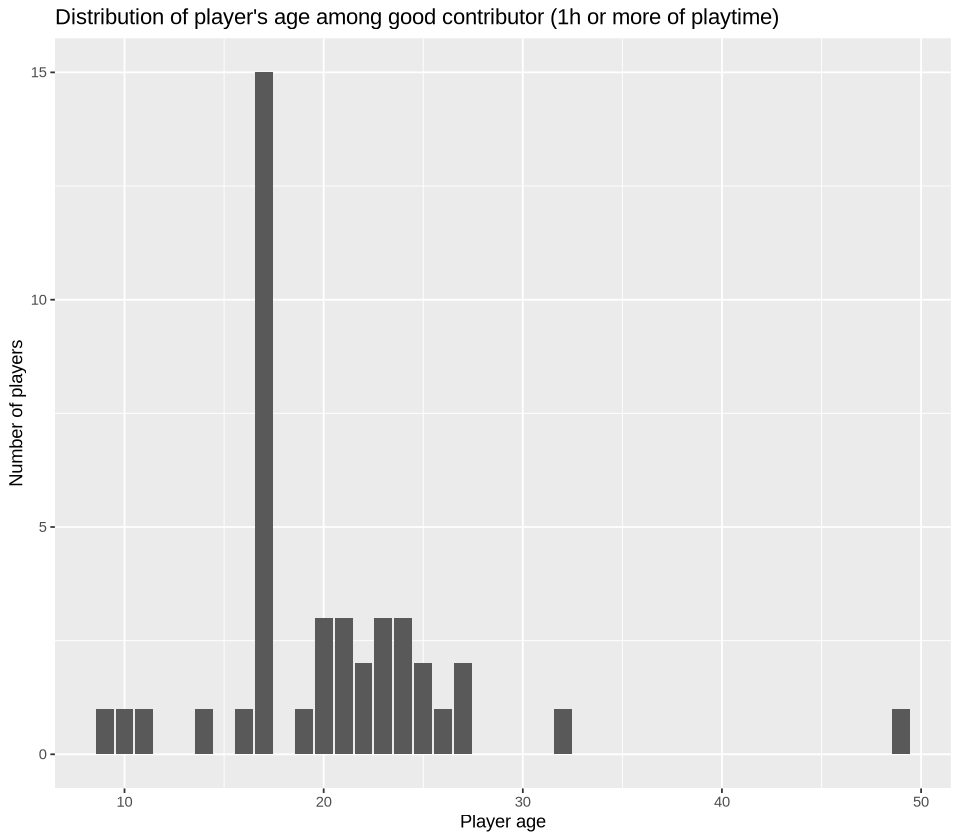

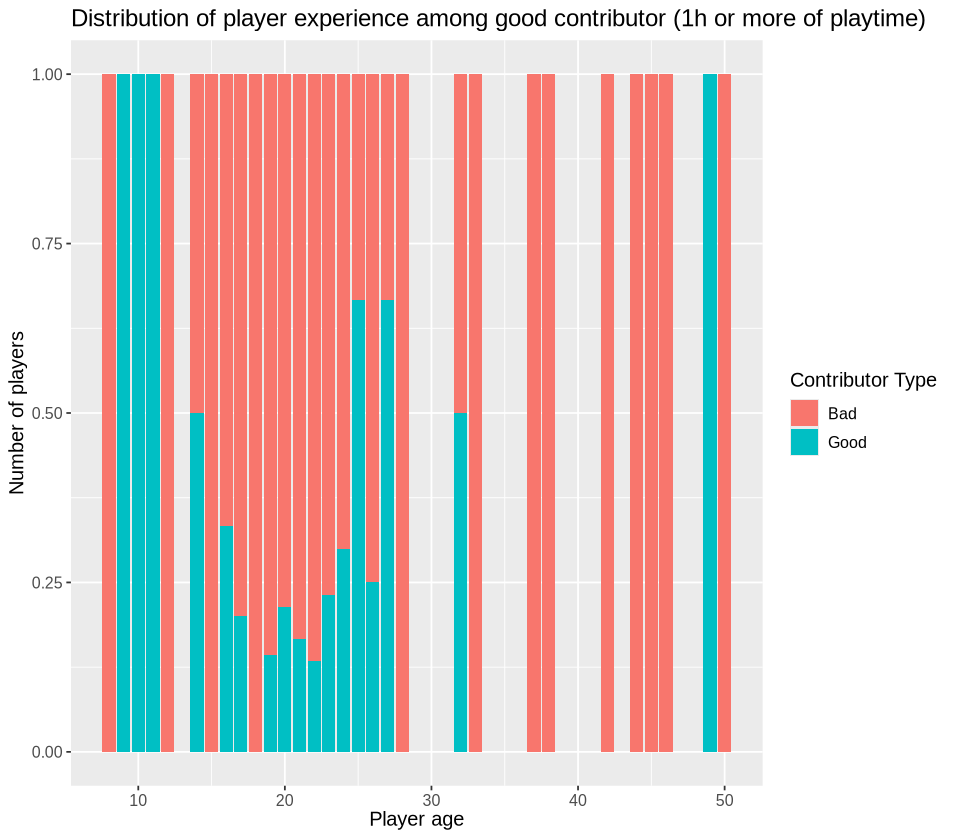

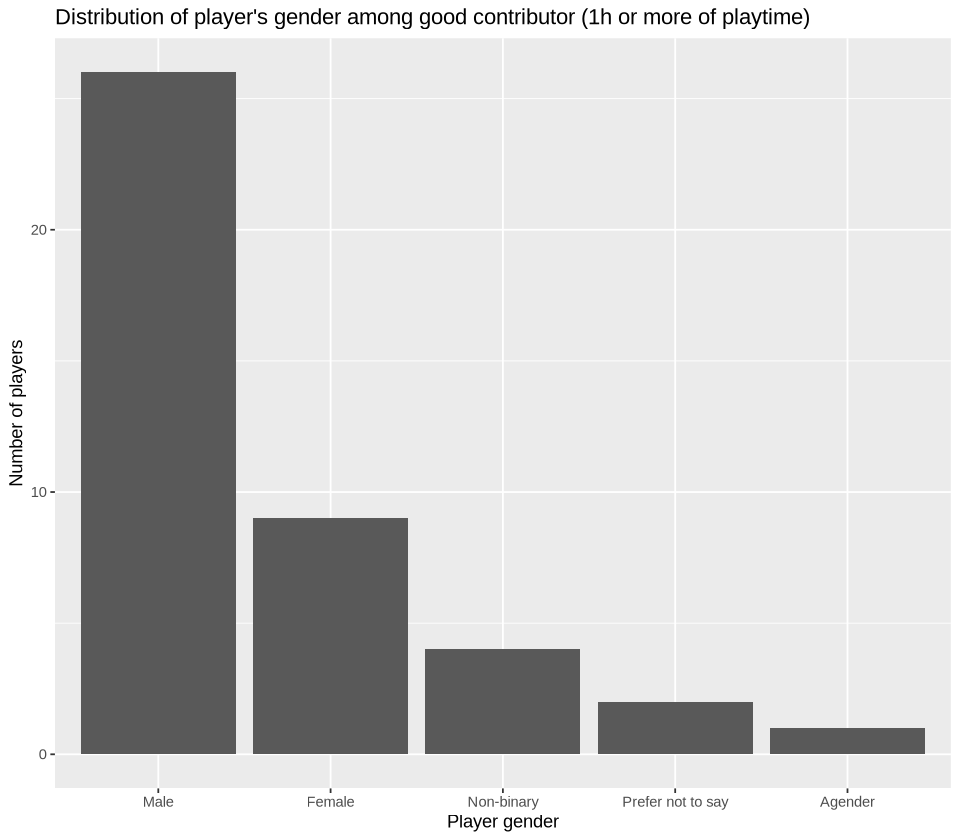

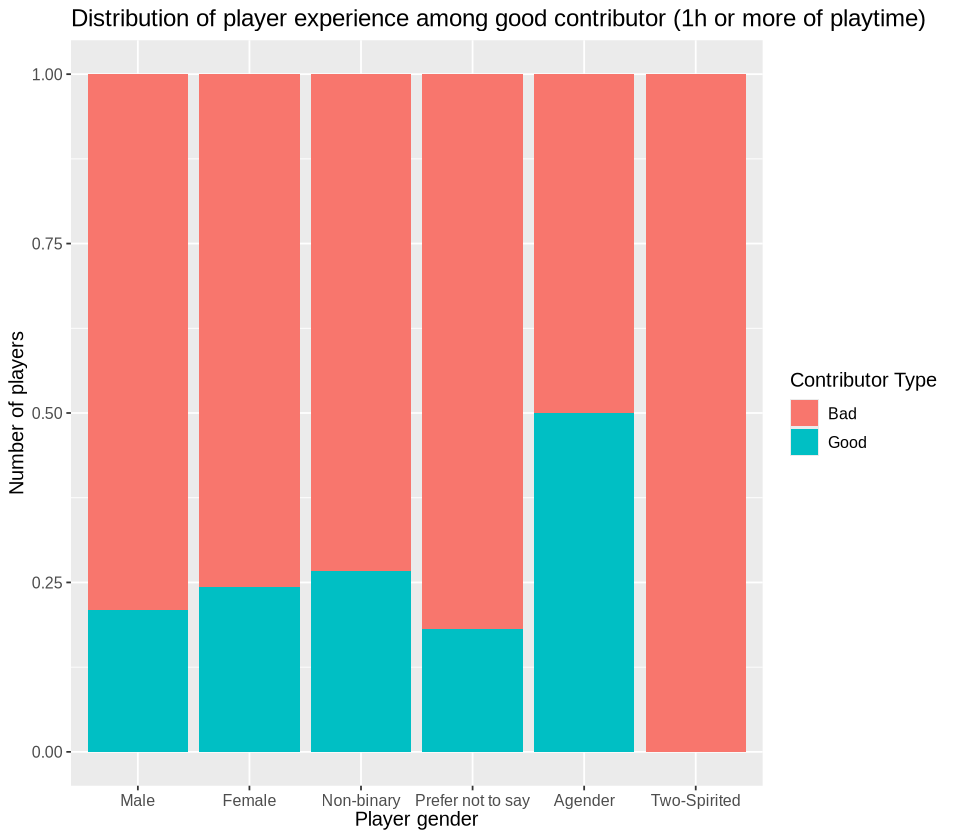

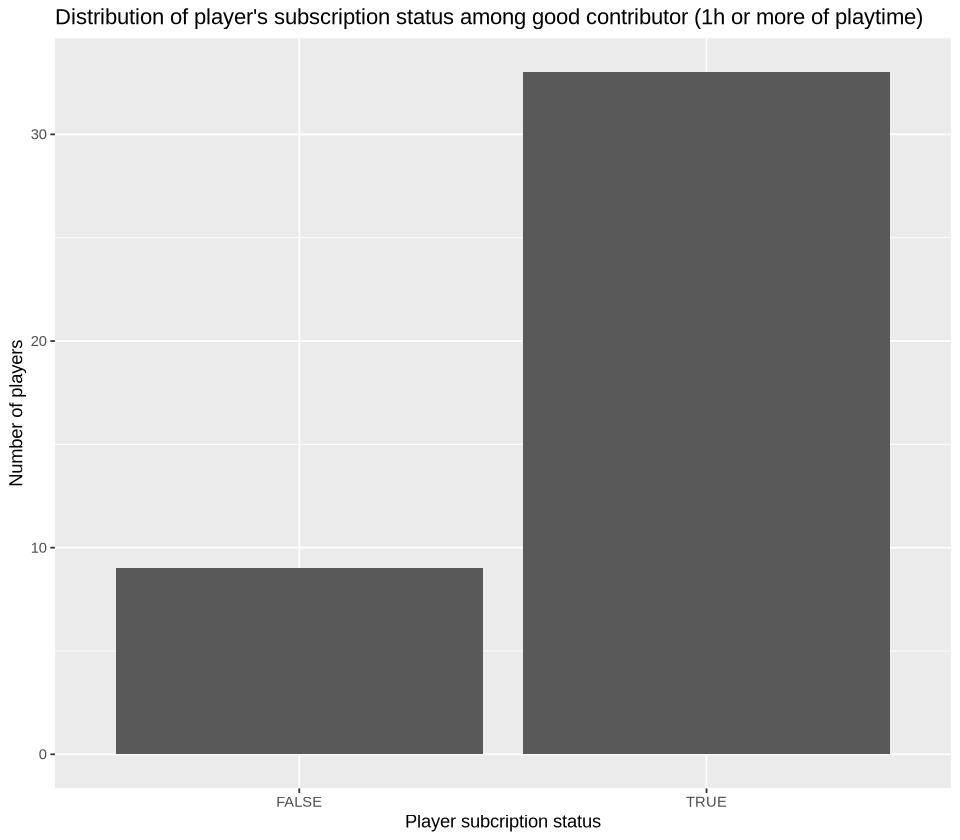

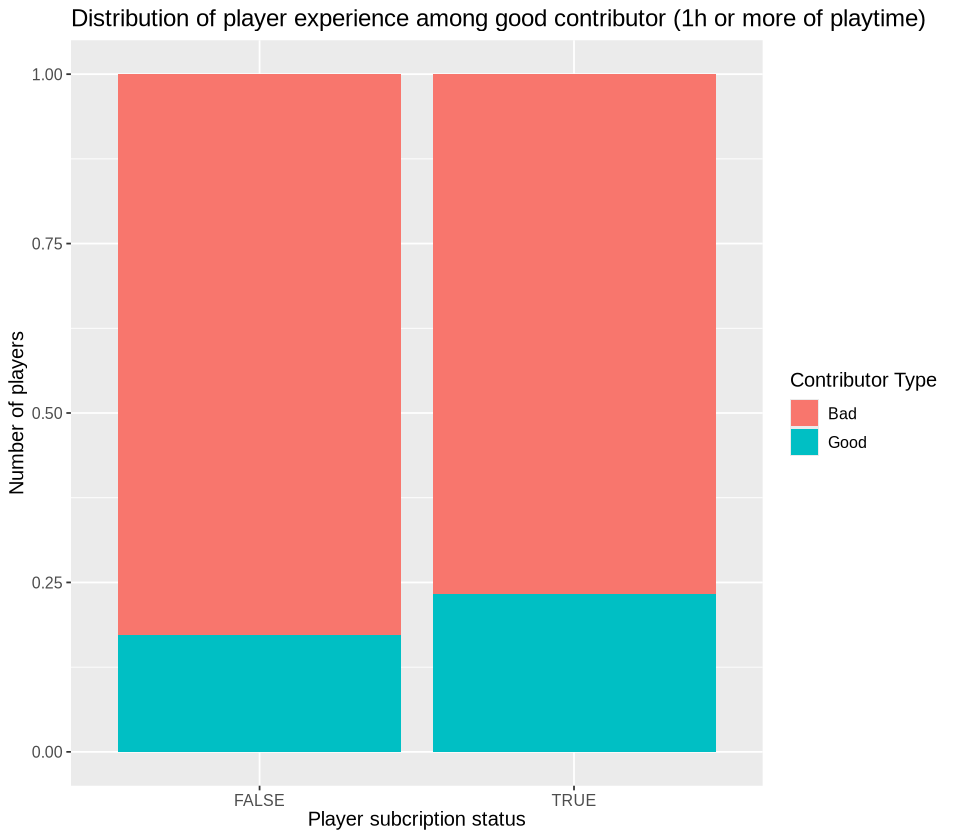

In [17]:
# VIZUALIZATIONS EXPLORING WHAT "GOOD CONTRIBUTORS" ARE LIKE
good_contributors <- labelled_data |>
    filter(contributor_type == "Good")
#good_contributors



# 1. EXPERIENCE

goodcontributors_experience <- good_contributors |>
    group_by(experience) |>
    count()
#goodcontributors_experience

experience_plot <- goodcontributors_experience |>
    ggplot(aes(x= experience, y= n)) +
    geom_bar(stat= "identity") +
    labs(x= "Player experience", y= "Number of players", title= "Distribution of player experience among good contributor (1h or more of playtime)")
experience_plot

#percentage
ggplot(labelled_data, aes(x = experience, fill = contributor_type)) +
geom_bar(stat = "count", position = "fill") +
labs(x= "Player experience", y= "Number of players", fill = "Contributor Type", title= "Distribution of player experience among good contributor (1h or more of playtime)") +
theme(text = element_text(size = 12))

# 2. age

goodcontributors_age <- good_contributors |>
    group_by(age) |>
    count()
#goodcontributors_age

age_plot <- goodcontributors_age |>
    ggplot(aes(x= age, y= n)) +
    geom_bar(stat= "identity") +
    labs(x= "Player age", y= "Number of players", title= "Distribution of player's age among good contributor (1h or more of playtime)")
age_plot

#percentage
ggplot(labelled_data, aes(x = age, fill = contributor_type)) +
geom_bar(stat = "count", position = "fill") +
labs(x= "Player age", y= "Number of players", fill = "Contributor Type", title= "Distribution of player experience among good contributor (1h or more of playtime)") +
theme(text = element_text(size = 12))

# 3. GENDER

goodcontributors_gender <- good_contributors |>
    group_by(gender) |>
    count()
#goodcontributors_gender

gender_plot <- goodcontributors_gender |>
    ggplot(aes(x= gender, y= n)) +
    geom_bar(stat= "identity") +
    labs(x= "Player gender", y= "Number of players", title= "Distribution of player's gender among good contributor (1h or more of playtime)")
gender_plot

#percentage
ggplot(labelled_data, aes(x = gender, fill = contributor_type)) +
geom_bar(stat = "count", position = "fill") +
labs(x= "Player gender", y= "Number of players", fill = "Contributor Type", title= "Distribution of player experience among good contributor (1h or more of playtime)") +
theme(text = element_text(size = 12))

# 4. SUBSCRIBE

goodcontributors_sub <- good_contributors |>
    group_by(subscribe) |>
    count()
#goodcontributors_sub

sub_plot <- goodcontributors_sub |>
    ggplot(aes(x= subscribe, y= n)) +
    geom_bar(stat= "identity") +
    labs(x= "Player subcription status", y= "Number of players", title= "Distribution of player's subscription status among good contributor (1h or more of playtime)")
sub_plot

#Percentage
ggplot(labelled_data, aes(x = subscribe, fill = contributor_type)) +
geom_bar(stat = "count", position = "fill") +
labs(x= "Player subcription status", y= "Number of players", fill = "Contributor Type", title= "Distribution of player experience among good contributor (1h or more of playtime)") +
theme(text = element_text(size = 12))



Warning message:
“Removed 5 rows containing missing values or values outside the scale range
(`geom_point()`).”


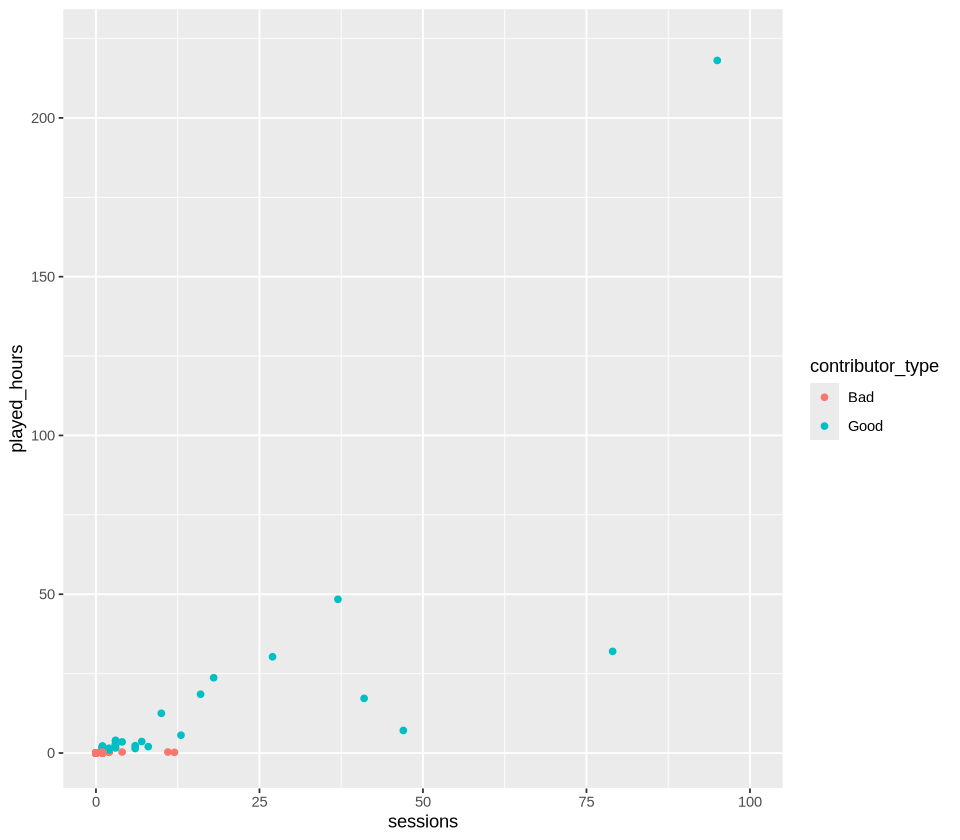

In [12]:
# visualizing some more stuff on contributors:

options(repr.plot.width = 8, repr.plot.height = 7)

viz_plot <- labelled_data |>
    ggplot(aes(x= sessions, y= played_hours, color = contributor_type)) +
    geom_point() +
    xlim(c(0, 100))
viz_plot